# Prediction using Decision Tree  Algorithm

## importing required library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

## load Iris data

In [2]:
# loading data from seaborn dataset
iris = pd.read_csv('Iris.csv')

In [3]:
# display iris dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#remove useless feature
iris.drop('Id',axis=1,inplace=True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA (Exploratory Data Analysis )

In [6]:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# description about all features
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# checking Nan or missing values
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# co-relation between features
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Analysing the data visually


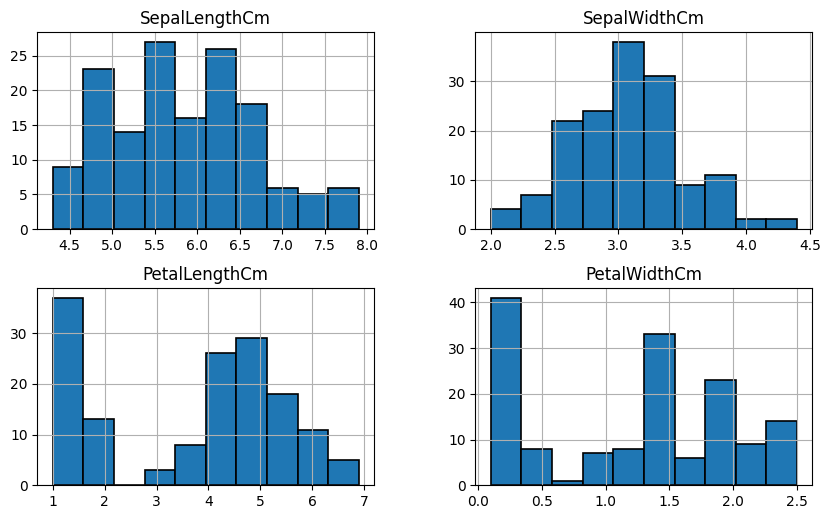

In [10]:
# histogram for all fetaures
plt.figure(dpi=100,figsize=(10,6))
ax = plt.gca()
iris.hist(edgecolor='black', linewidth=1.2,ax=ax)
plt.show()

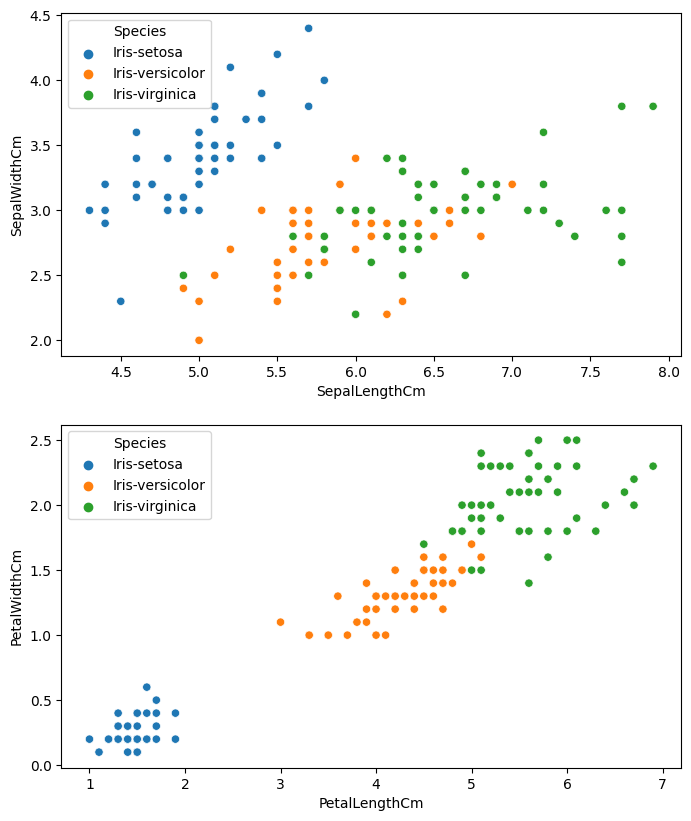

In [11]:
# scatter plot 

plt.figure(figsize = (8,10),dpi=100)
plt.subplot(2,1,1)
sns.scatterplot('SepalLengthCm','SepalWidthCm',data=iris,hue='Species')
plt.subplot(2,1,2)
sns.scatterplot('PetalLengthCm', 'PetalWidthCm',data=iris,hue='Species')
plt.show()

<Figure size 600x400 with 0 Axes>

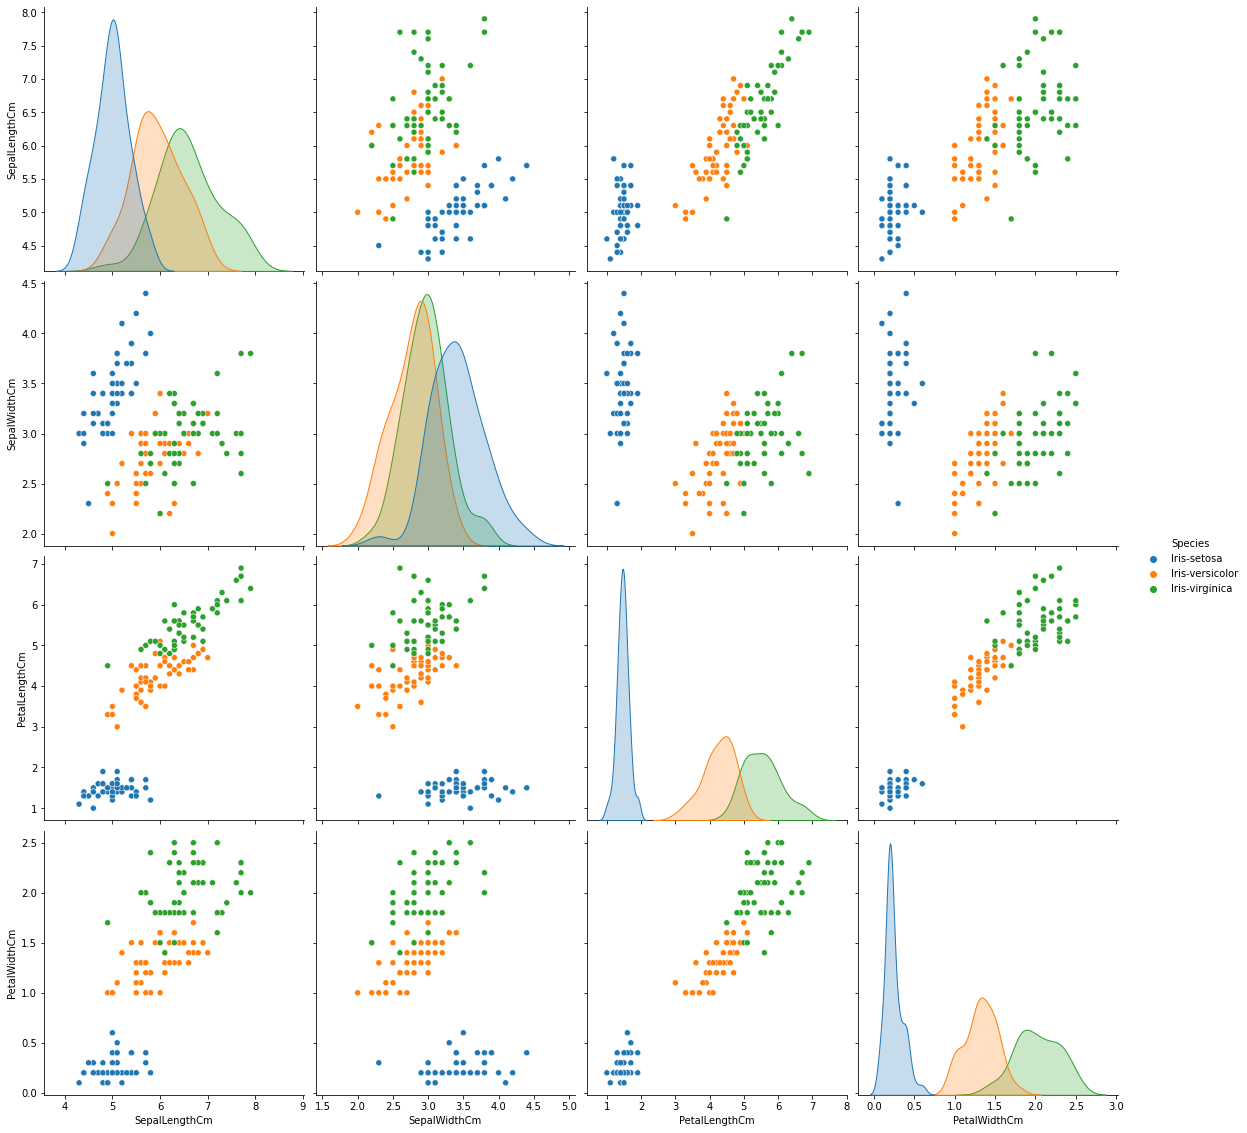

In [12]:
# pair plot 

plt.figure(dpi=100)

sns.pairplot(iris,hue='Species',size=4)
plt.show()

## spliting data for training and testing

In [13]:
X = iris.drop('Species',axis=1).copy()
y = iris['Species']

In [14]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [16]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,random_state=23,test_size=0.3)
(train_index, test_index), = split.split(X,y)

X_train,X_test,y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

In [18]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
33,5.5,4.2,1.4,0.2
23,5.1,3.3,1.7,0.5
83,6.0,2.7,5.1,1.6
59,5.2,2.7,3.9,1.4


In [19]:
y_train.head()

125     Iris-virginica
33         Iris-setosa
23         Iris-setosa
83     Iris-versicolor
59     Iris-versicolor
Name: Species, dtype: object

In [20]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
43,5.0,3.5,1.6,0.6
146,6.3,2.5,5.0,1.9
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2
131,7.9,3.8,6.4,2.0


In [21]:
y_test.head()

43         Iris-setosa
146     Iris-virginica
81     Iris-versicolor
11         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

### Feature Scaling

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


### Decision Tree Model

In [24]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)

model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test  = model.predict(X_test)

print("_"*80)
print()
print(f"Training Accuracy: {accuracy_score(y_train, y_hat_train):.2f}")
print(f"Test     Accuracy: {accuracy_score(y_test, y_hat_test):.2f}")

print(f"Training confusion matrix : \n{confusion_matrix(y_train, y_hat_train)}" )
print(f"Test  confusion matix : \n{confusion_matrix(y_test, y_hat_test)}")
print()
print('Training classification report :\n',classification_report(y_train,y_hat_train))
print('Test classification report :\n',classification_report(y_test,y_hat_test))
print('\n\n')




________________________________________________________________________________

Training Accuracy: 0.96
Test     Accuracy: 0.96
Training confusion matrix : 
[[35  0  0]
 [ 0 34  1]
 [ 0  3 32]]
Test  confusion matix : 
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

Training classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.92      0.97      0.94        35
 Iris-virginica       0.97      0.91      0.94        35

       accuracy                           0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.96      0.96      0.96       105

Test classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.9

In [25]:
from sklearn import tree


## Print Text Representation

In [26]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= -0.67
|   |--- class: Iris-setosa
|--- feature_2 >  -0.67
|   |--- feature_3 <= 0.69
|   |   |--- class: Iris-versicolor
|   |--- feature_3 >  0.69
|   |   |--- class: Iris-virginica



## Plot Tree with plot_tree

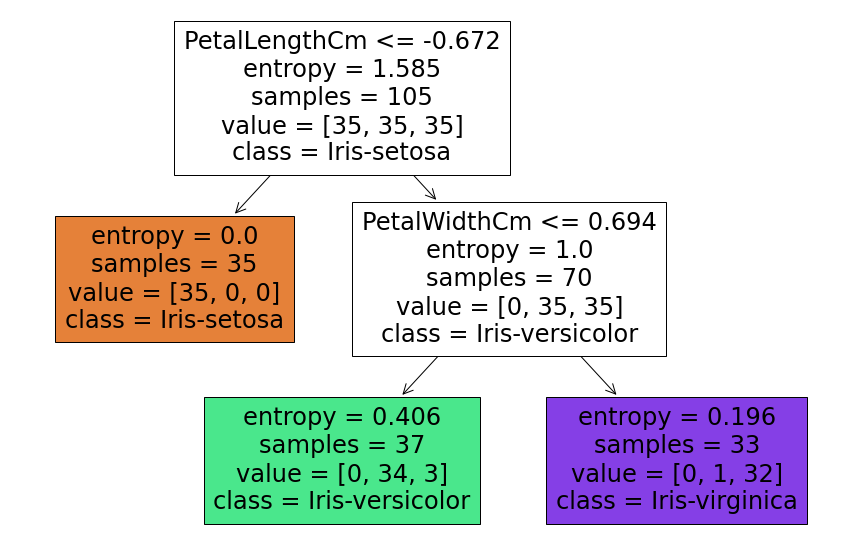

In [27]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=y.unique(),
                   filled=True)
plt.show()